<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/SkaterPCOSipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

 Advertising.html
'Akshata KM Resume.pdf'
'Akshata Resume.pdf'
'Colab Notebooks'
'Data Science and Big Data Analytics.pdf'
'Document Back up Boeing '
 Epic_Data_Analysis.ipynb
 Epic_Sample.csv
 FeatureHumana.csv
 holdout.csv
 holdoutmodel.csv
 inputmodel.csv
 modeldata.csv
'New_data (1).csv'
 New_data.csv
 NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv
 OutputResultsHumana.csv
 PCOS_Data.csv
 SWEETVIZ_REPORT.html
'UMD Textbooks'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
'USA Visa Documents'
/content/drive/My Drive


In [5]:
import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.5'), ('pandas', '1.1.3'), ('seaborn', '0.11.0')]

In [6]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## model evaluation
    !pip install -U watermark
    !pip install -U xgboost
    !pip install -U eli5
    !pip install -U shap
    !pip install -U pdpbox
    !pip install -U yellowbrick
    !pip install -U lime
    !pip install -U skater 
    #### print
    print('Environment: Google Colaboratory.')


In [7]:
import pandas as pd 
df = pd.read_csv('PCOS_Data.csv')
from sklearn.model_selection import train_test_split

target = 'PCOS (Y/N)'

df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [ ]:
##### Import sklearn and required libraries####

In [8]:
%matplotlib inline
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm

In [ ]:
######Load PCOS dataset form sklearn

In [9]:
df = pd.read_csv('PCOS_Data.csv')
target = 'PCOS (Y/N)'



In [ ]:
##########Create Random Forest classifier#####

In [10]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [ ]:
###################Splitting the data into Train and Test$$##########

In [11]:
df_Xtrain, df_Xtest, ser_ytrain, ser_ytest = train_test_split(
    df.drop(target,axis=1), df[target],
    test_size=0.2, random_state=SEED, stratify=df[target])

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

features_train = df_Xtrain.columns.to_list()
features_train
clf = clf.fit(df_Xtrain, ytrain)

In [10]:
y_pred=clf.predict(df_Xtest)

In [11]:
prob=clf.predict_proba(df_Xtest)

In [ ]:
############Inference with SKATER -- Global Interpretations

In [13]:
! pip install skater 

     |████████████████████████████████| 102kB 2.5MB/s 
     |████████████████████████████████| 25.3MB 168kB/s 
     |████████████████████████████████| 256kB 42.1MB/s 
     |████████████████████████████████| 174kB 42.2MB/s 
     |████████████████████████████████| 184kB 44.7MB/s 
     |████████████████████████████████| 133kB 47.8MB/s 
  ERROR: Failed building wheel for skater
  Running setup.py clean for skater
  Created wheel for ds-lime: filename=ds_lime-0.1.1.27-cp36-none-any.whl size=261596 sha256=301ab7519a28d923253c493d01008306d5cfe8d3a525dfcbe95e442c1c5c5847
  Stored in directory: /root/.cache/pip/wheels/d2/d4/1a/aea47d52f483349f78aa13ba18adaa5ca69f3c68da0ecb859a
  Created wheel for wordcloud: filename=wordcloud-1.3.1-cp36-cp36m-linux_x86_64.whl size=281723 sha256=3bf04e8a5724b552cd676e99261c0e888f29fe24d3686a8cadeab2589eaba09a
  Stored in directory: /root/.cache/pip/wheels/4a/36/e1/1ba3d735db8ffb1eb276d30f22c406105598cbfb345d5e7295
Successfully built ds-lime wordcloud
Failed to b

In [12]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

interpreter = Interpretation(
        training_data=df_Xtrain, training_labels=ytrain, feature_names=features_train
    )
pyint_model = InMemoryModel(
            clf.predict_proba,
            examples=df_Xtrain,
            target_names=features_train,
            unique_values=np.unique(ytrain).tolist(),
            feature_names=features_train,
        )

In [ ]:
#######Partial Dependence Plot

In [13]:
features_train

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'Hip(inch)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [ ]:
###########FEATURE IMPORTANCE PLOT 

2020-10-31 22:19:06,070 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 6 seconds

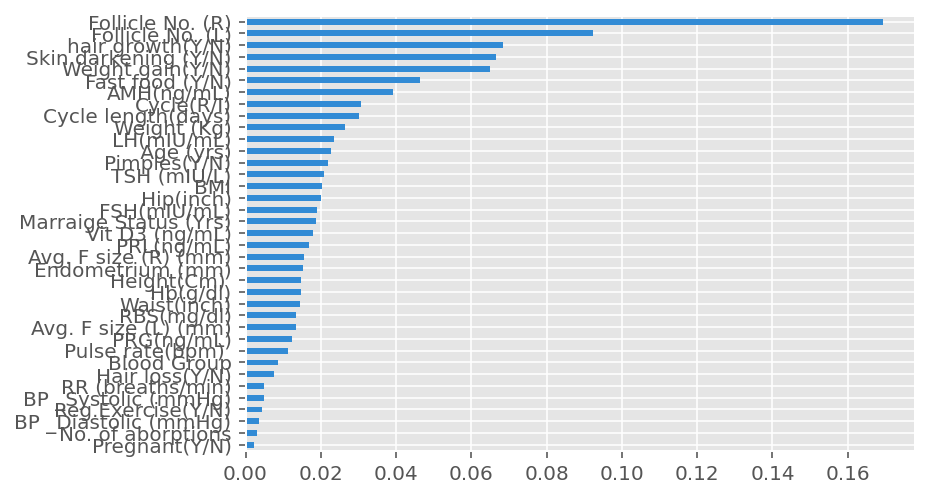

In [16]:

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending=True, progressbar=True,
                                n_jobs=-1)

2020-10-31 22:22:53,854 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2020-10-31 22:22:53,866 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used cross-entropy
2020-10-31 22:22:53,869 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 9.992007221626413e-16
2020-10-31 22:22:53,947 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [7, 12]
2020-10-31 22:22:53,949 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (423, 2)
2020-10-31 22:22:53,956 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.008; oracle score 0.093
2020-10-31 22:22:53,958 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.085 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lo

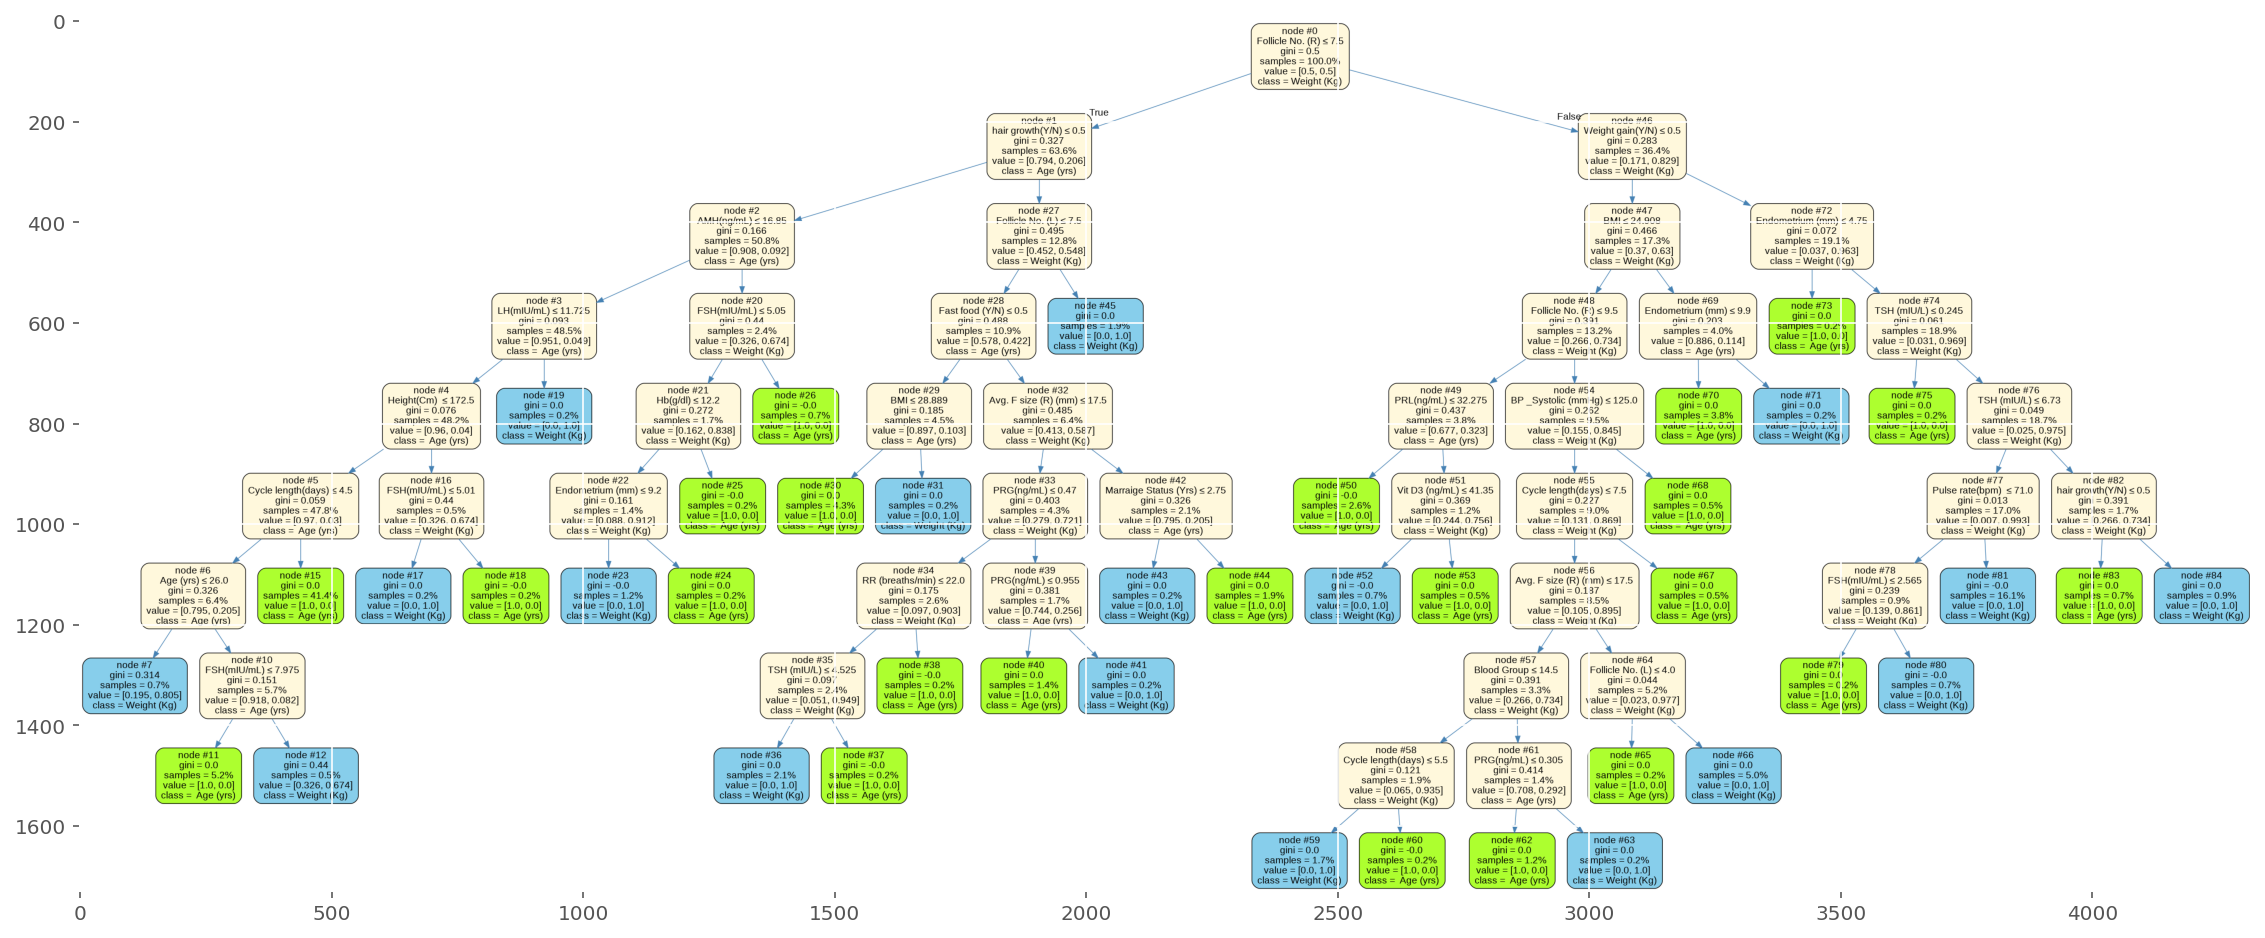

In [19]:

surrogate_explainer = interpreter.tree_surrogate(oracle=pyint_model, seed=5)
surrogate_explainer.fit(df_Xtrain, ytrain)
surrogate_explainer.plot_global_decisions(show_img=True)

In [18]:
surrogate_explainer.decisions_as_txt()

if Follicle No. (R) <= 7.5 {
  if hair growth(Y/N) <= 0.5 {
    if AMH(ng/mL) <= 16.84999942779541 {
      if LH(mIU/mL) <= 11.724999904632568 {
        if Height(Cm)  <= 172.5 {
          if Cycle length(days) <= 4.5 {
            if  Age (yrs) <= 26.0 {
              if TSH (mIU/L) <= 5.400000214576721 {
            } else {
              if FSH(mIU/mL) <= 7.974999904632568 {
                  Predicted Label: 0
              } else {
                if Vit D3 (ng/mL) <= 21.100000381469727 {
              }
            }
          } else {
              Predicted Label: 0
          }
        } else {
          if FSH(mIU/mL) <= 5.009999990463257 {
              Predicted Label: 1
          } else {
              Predicted Label: 0
          }
        }
      } else {
          Predicted Label: 1
      }
    } else {
      if FSH(mIU/mL) <= 5.049999952316284 {
        if Hb(g/dl) <= 12.199999809265137 {
          if Endometrium (mm) <= 9.199999809265137 {
              Predicted Label

In [ ]:
########## SHAP Plot 

In [23]:
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {'gb':GradientBoostingClassifier(), 
          'mlp':MLPClassifier(), 
          'knn':KNeighborsClassifier(), 
          'reg':LogisticRegression()}

for model_key in models:
    model = models[model_key]
    model.fit(df_Xtrain, ytrain)
    preds = model.predict(df_Xtest)
    f1 = f1_score(ytest, preds)
    print("F1 for {0}: {1}".format(model_key, f1))

F1 for gb: 0.8888888888888888
F1 for mlp: 0.8205128205128205
F1 for knn: 0.5818181818181817
F1 for reg: 0.8115942028985507


2020-10-31 22:29:18,718 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 4 seconds

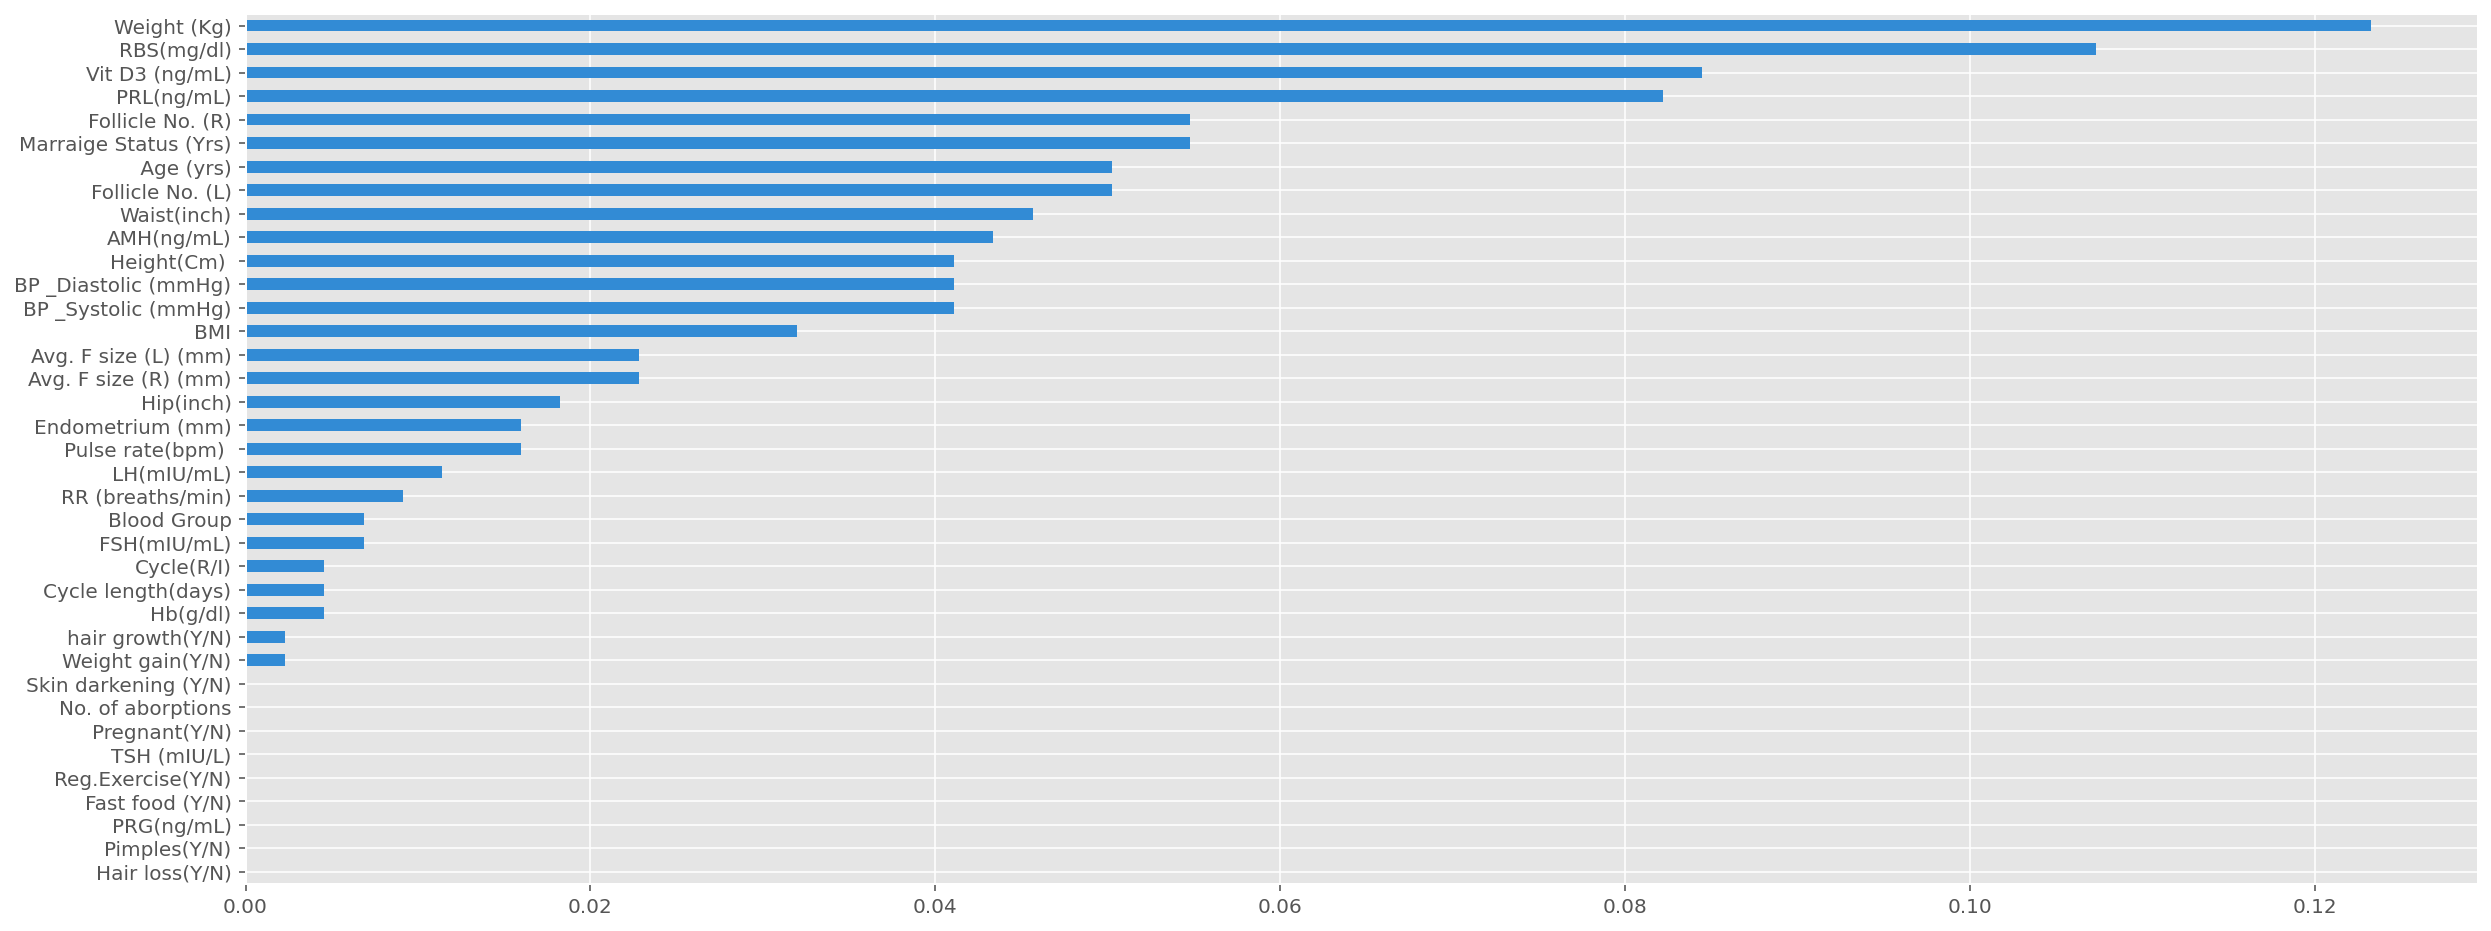

In [25]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(df_Xtest, feature_names=features_train)
model = InMemoryModel(models['knn'].predict_proba, examples=df_Xtrain)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

2020-10-31 22:29:42,538 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 4 seconds

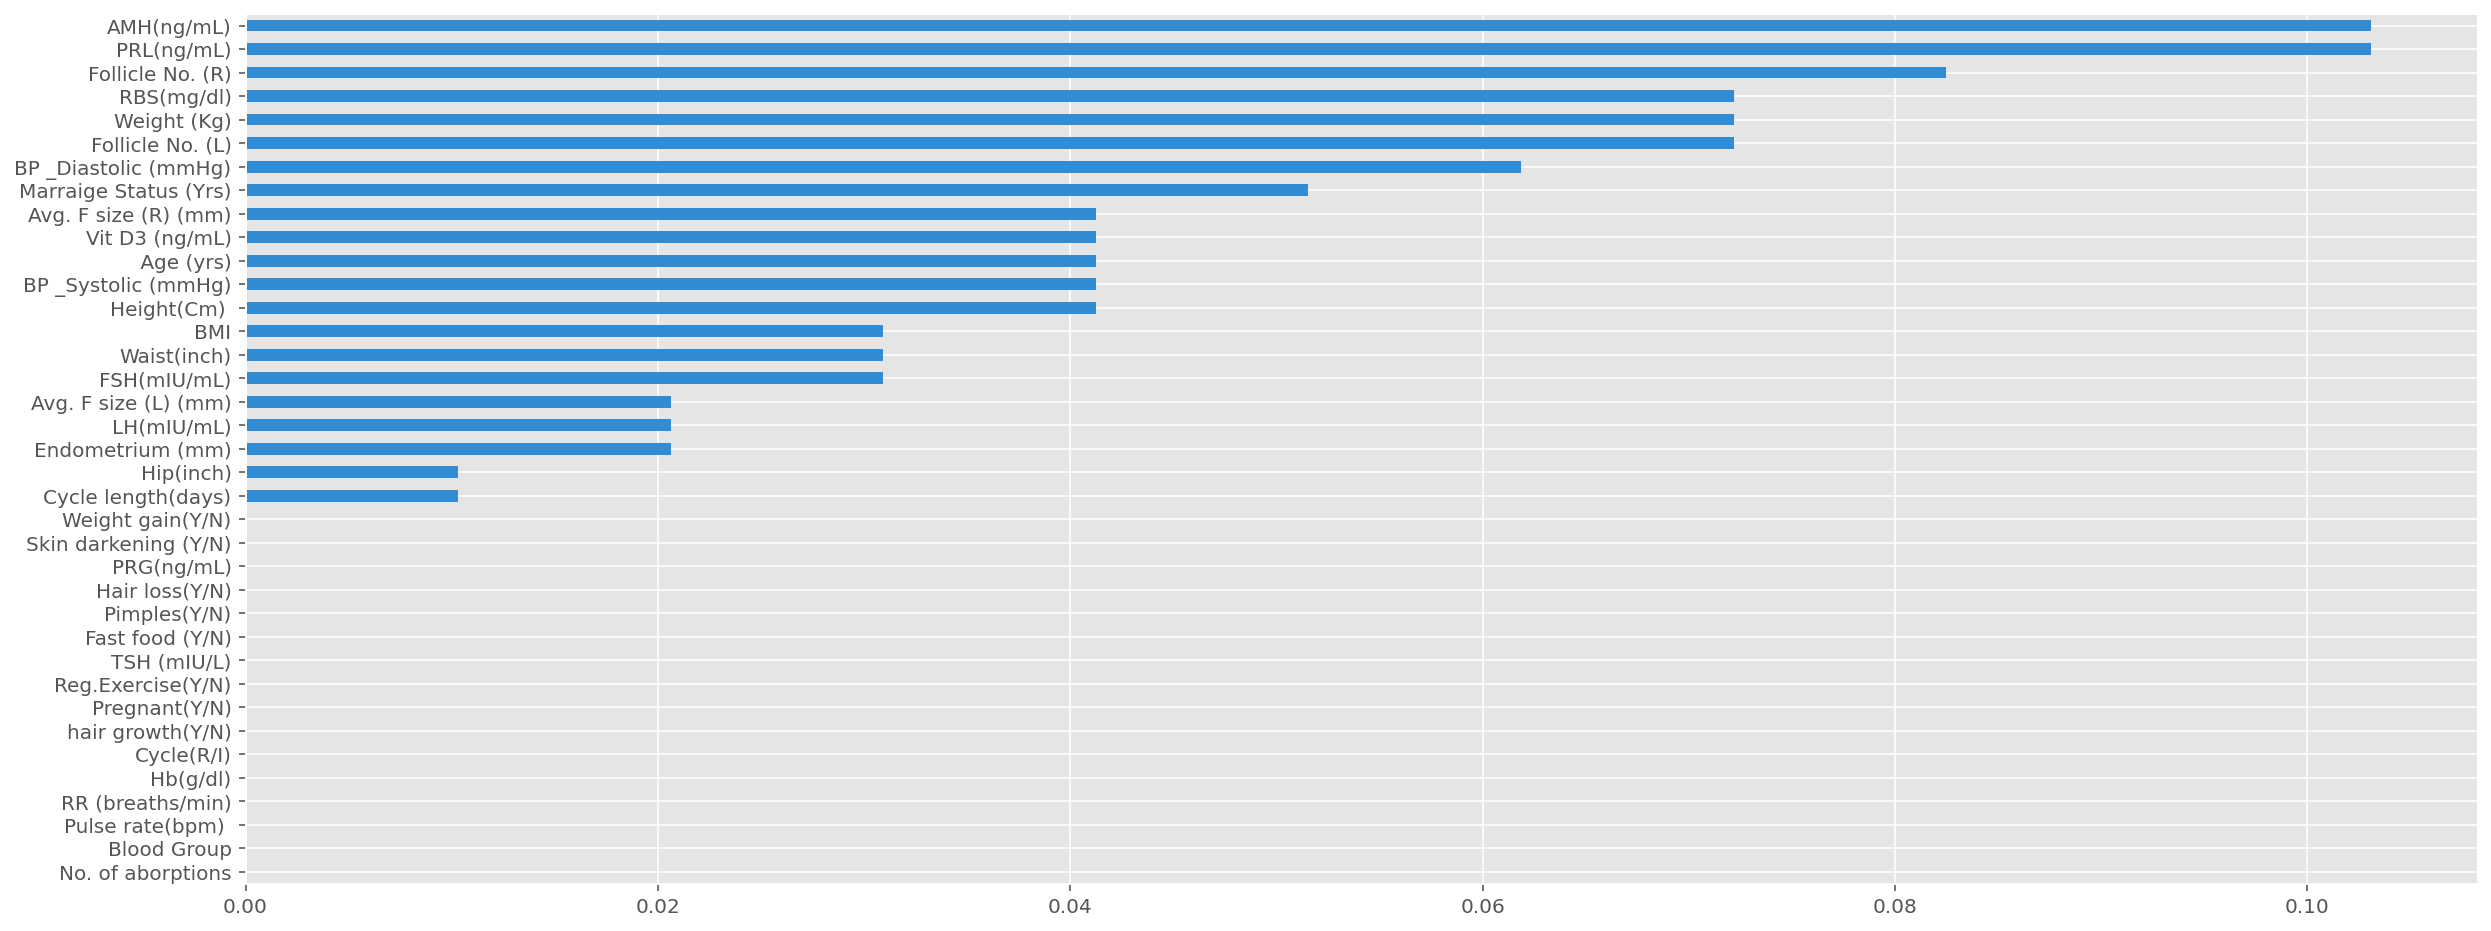

In [26]:
model_no_proba = InMemoryModel(models['knn'].predict, 
                      examples=df_Xtrain, 
                      unique_values=models['knn'].classes_)
plots = interpreter.feature_importance.plot_feature_importance(model_no_proba, ascending=True)

2020-10-31 22:30:25,798 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 5 seconds

2020-10-31 22:30:31,038 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 5 seconds

2020-10-31 22:30:36,600 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 4 seconds

2020-10-31 22:30:40,802 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[37/37] features ████████████████████ Time elapsed: 3 seconds

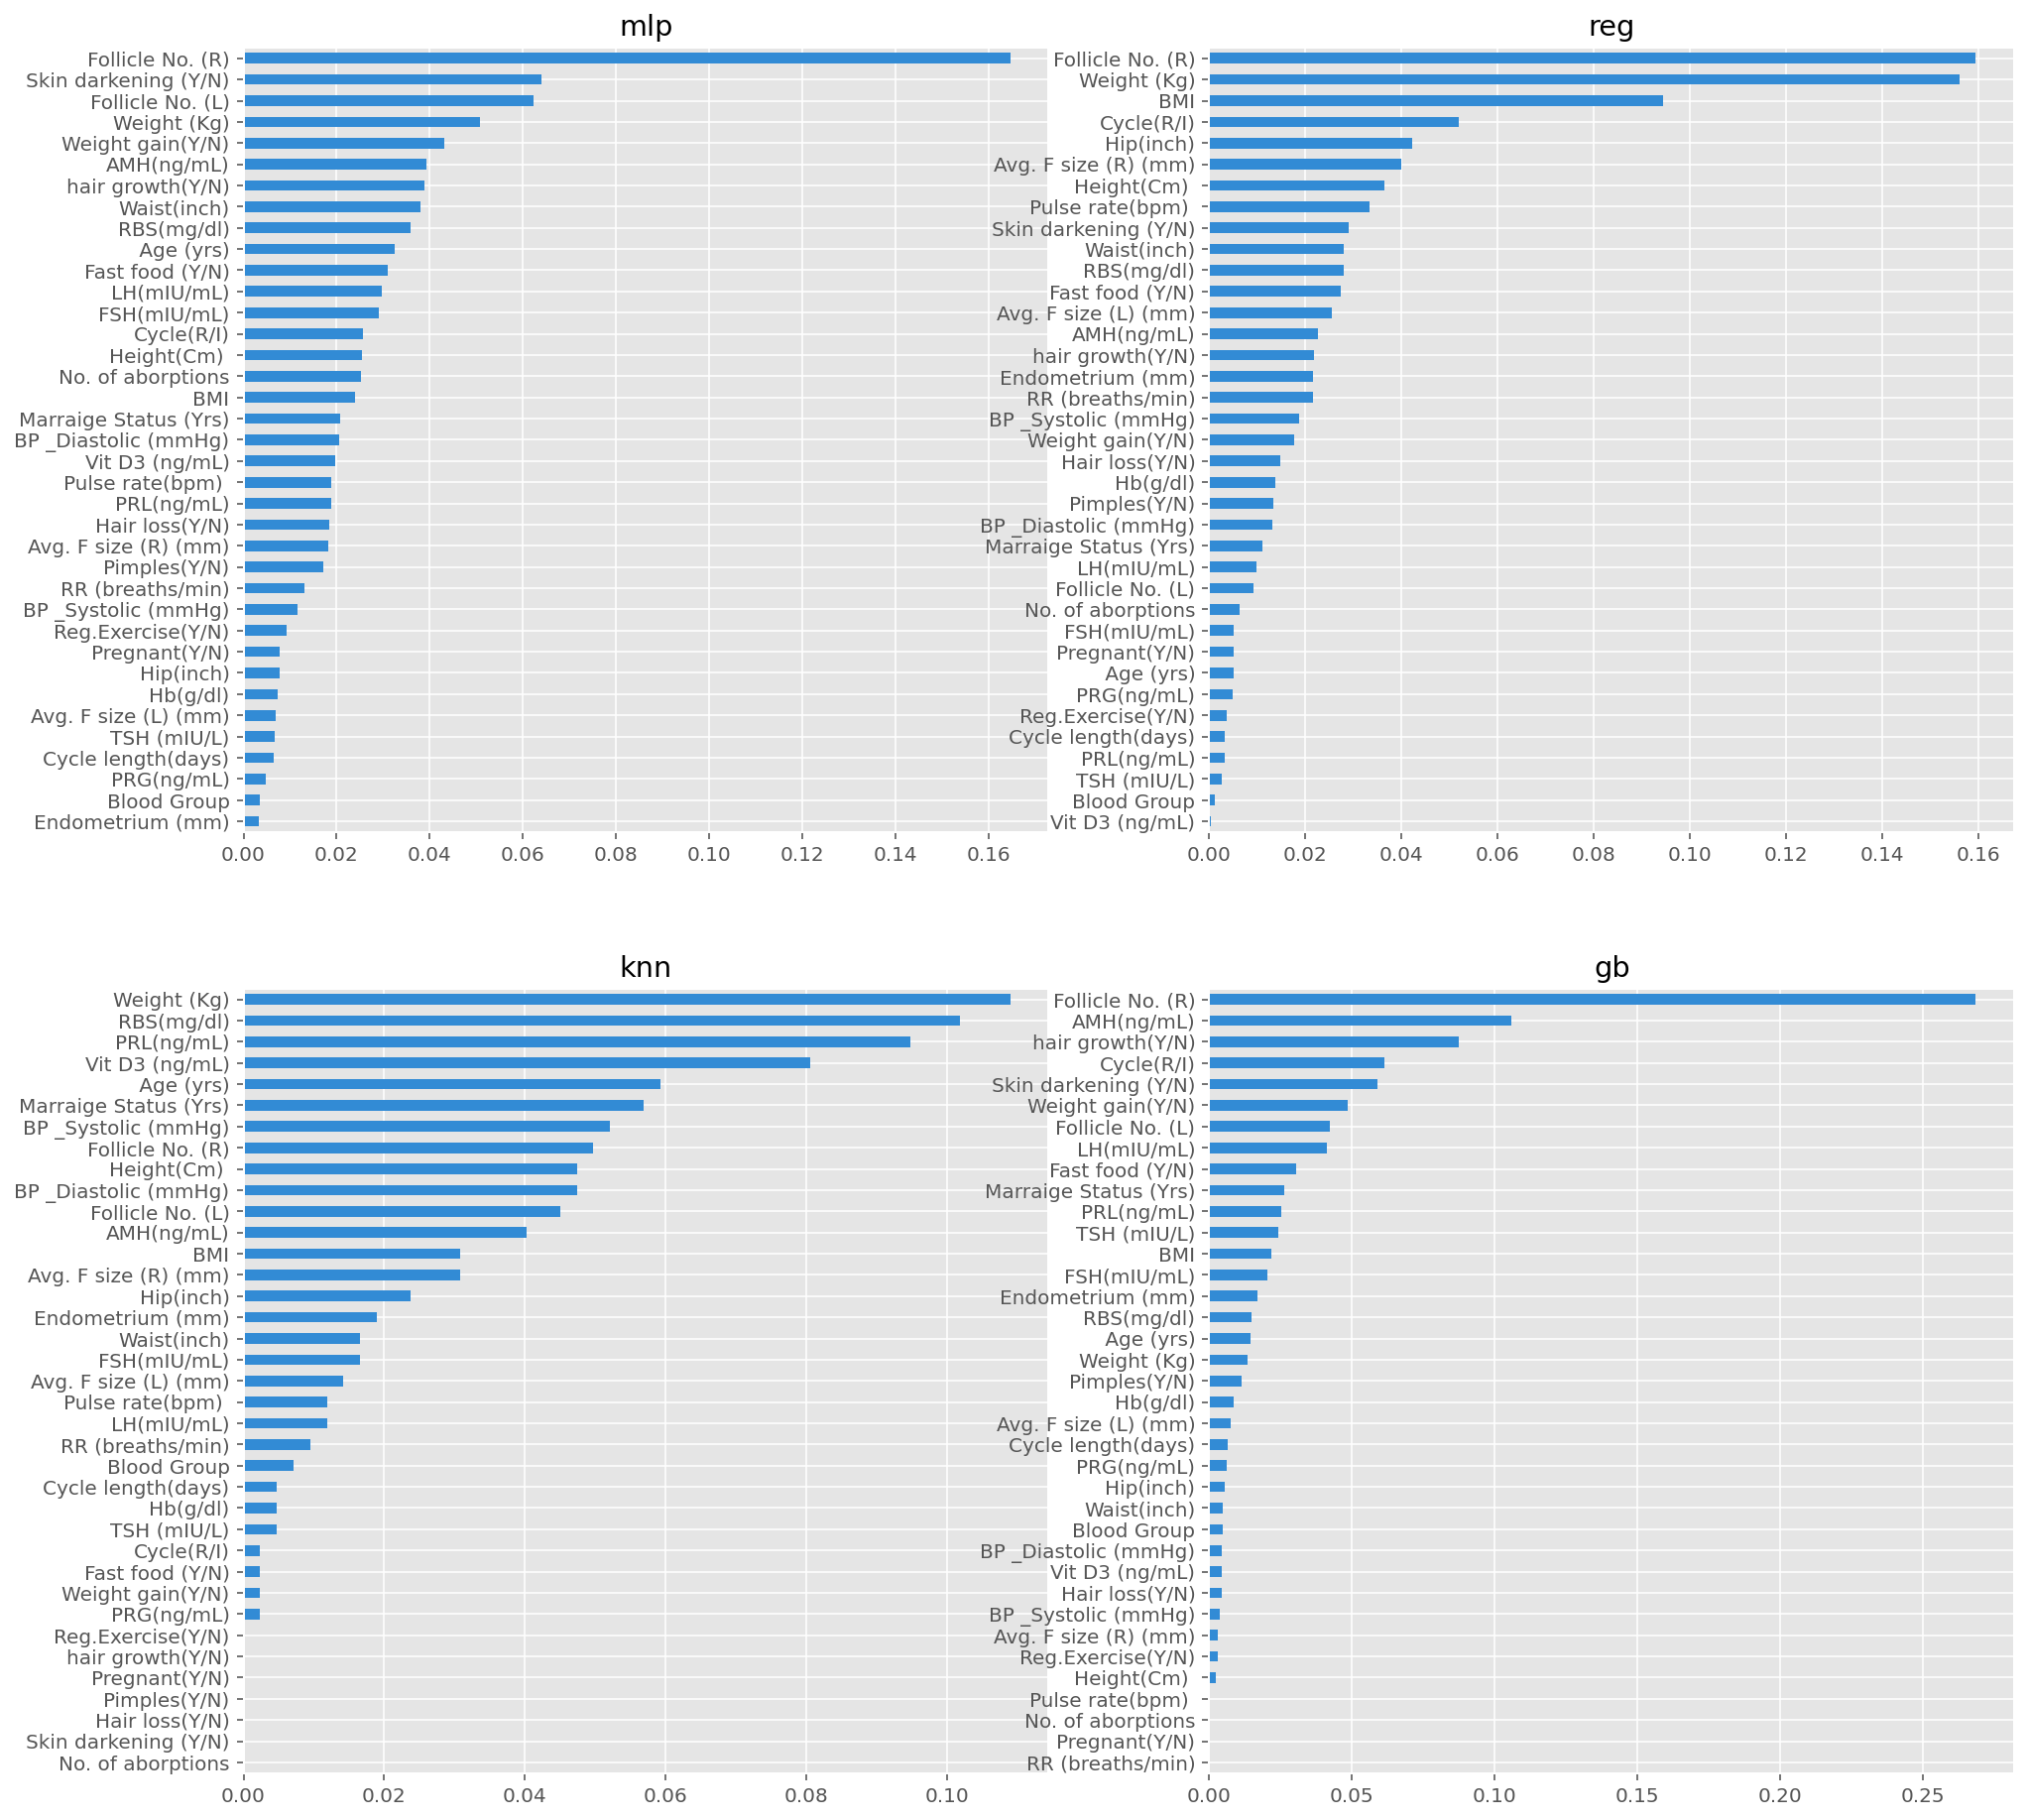

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

f, axes = plt.subplots(2,2, figsize = (16, 16))

ax_dict = {
    'mlp':axes[0][0],
    'knn':axes[1][0],
    'reg':axes[0][1],
    'gb':axes[1][1]
}

interpreter = Interpretation(df_Xtest, feature_names=features_train)

for model_key in models:
    pyint_model = InMemoryModel(models[model_key].predict_proba, examples=df_Xtrain)
    ax = ax_dict[model_key]
    interpreter.feature_importance.plot_feature_importance(pyint_model, ax=ax, ascending = True)
    ax.set_title(model_key)

2020-10-31 22:34:03,270 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 5 seconds

2020-10-31 22:34:08,598 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 5 seconds

2020-10-31 22:34:14,109 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 4 seconds

2020-10-31 22:34:19,213 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[30/30] grid cells ████████████████████ Time elapsed: 5 seconds

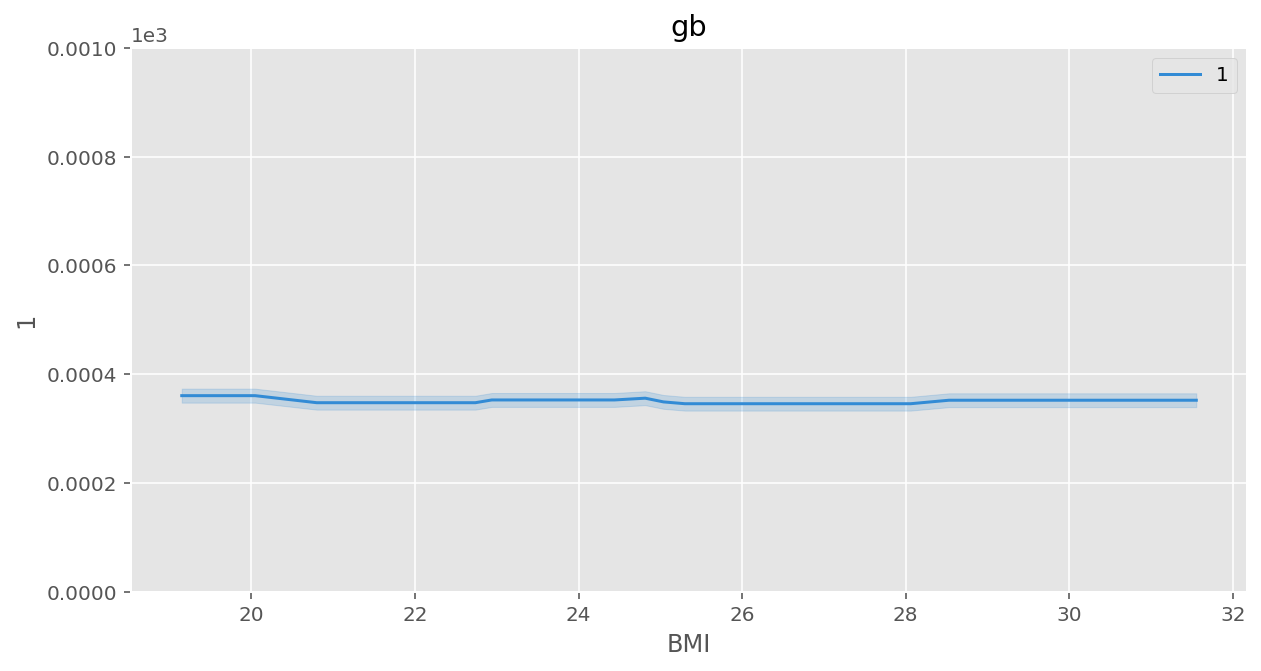

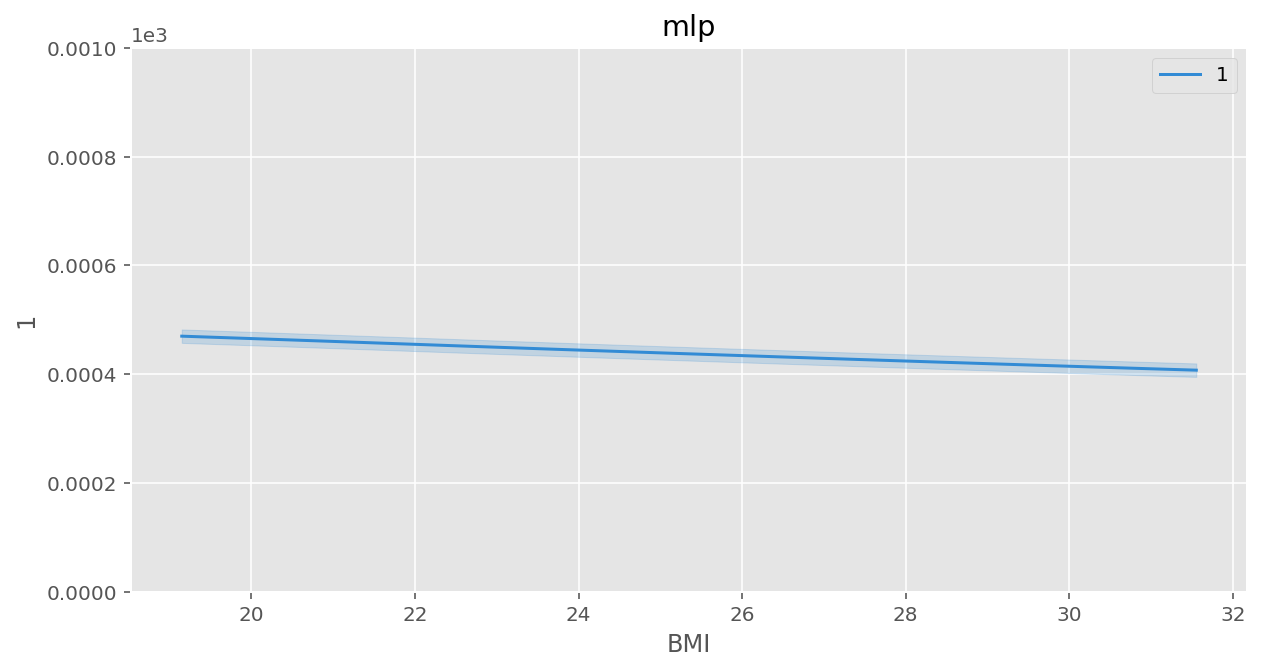

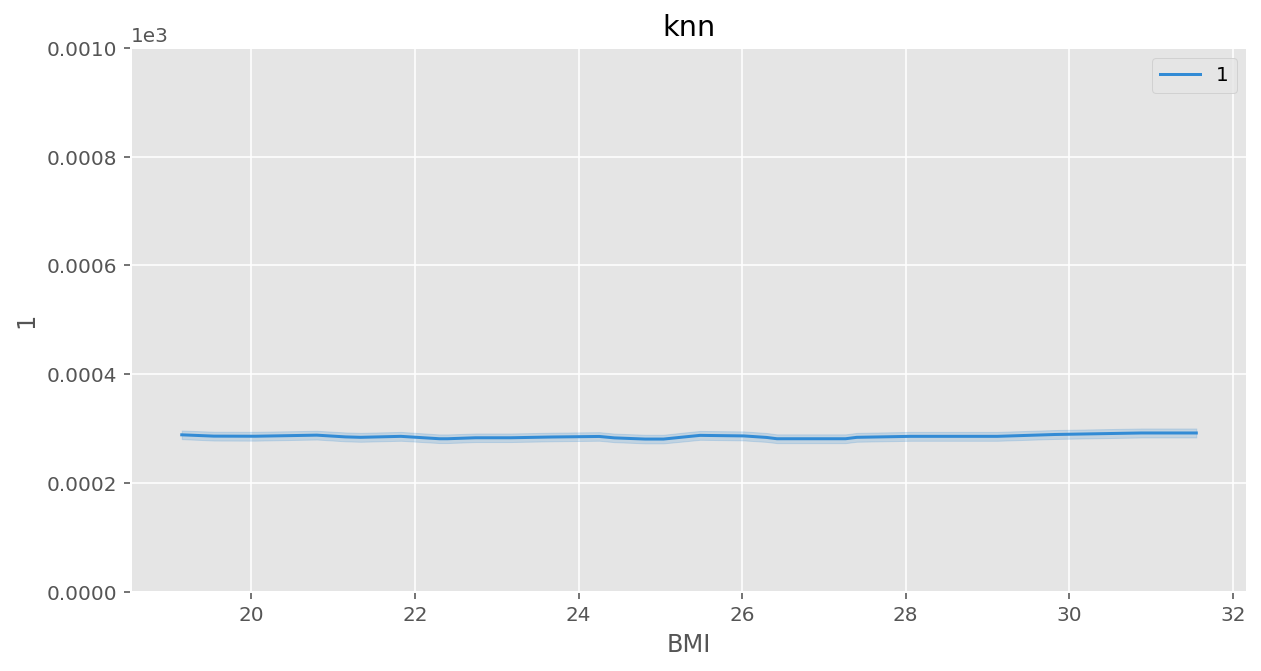

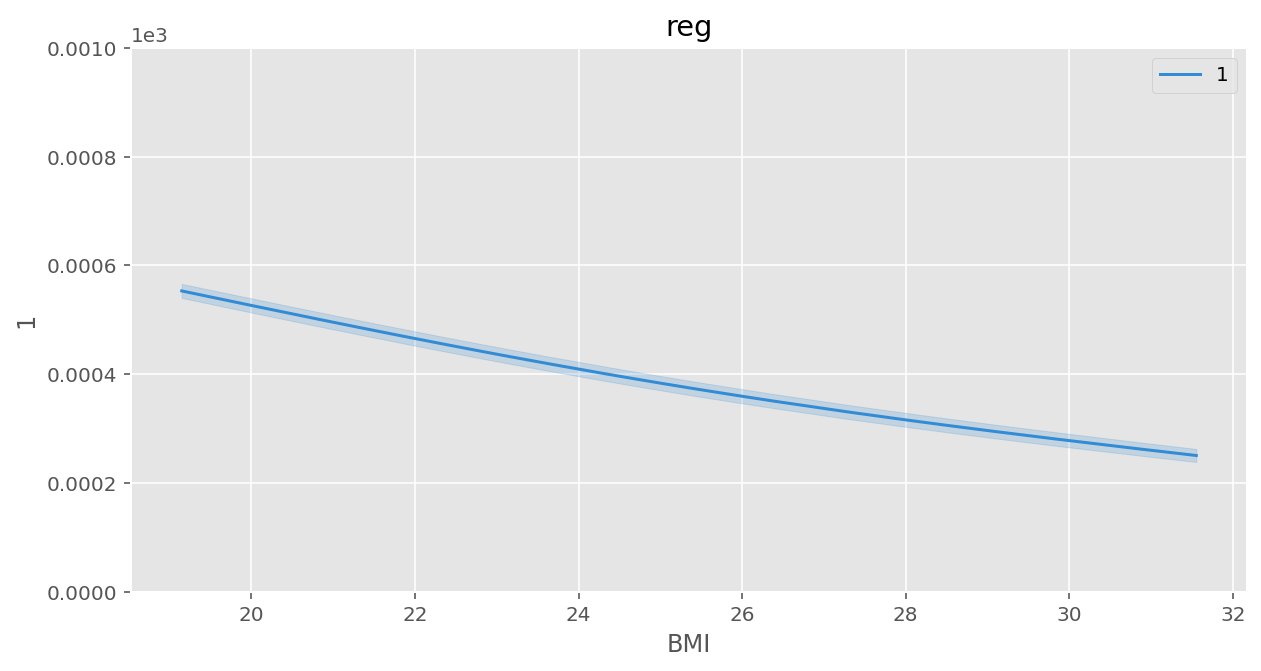

In [30]:
for model_key in models:
    pyint_model = InMemoryModel(models[model_key].predict_proba, examples=df_Xtrain, target_names=['0', '1'])
    axes_list = interpreter.partial_dependence.plot_partial_dependence(['BMI'],
                                                                       pyint_model, 
                                                                       grid_resolution=30, 
                                                                       with_variance=True,
                                                                       figsize = (10, 5))
    ax = axes_list[0][1]
    ax.set_title(model_key)
    ax.set_ylim(0, 1)

In [32]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
exp = LimeTabularExplainer(df_Xtrain.values, 
                           feature_names=features_train, 
                           discretize_continuous=True, 
                           class_names=['0', '1'])
exp.explain_instance(df_Xtrain.iloc[0].values, models['gb'].predict_proba).show_in_notebook()

In [33]:
exp.explain_instance(df_Xtrain.iloc[0].values, models['knn'].predict_proba).show_in_notebook()

In [41]:
y_hat_train = models['gb'].predict(df_Xtrain)
y_hat = models['gb'].predict(df_Xtest)
print("Training report ...")
from sklearn.metrics import classification_report
print(classification_report(ytrain, y_hat_train))


print("--------------------------------------------------")
print("Testing report ...")
from sklearn.metrics import classification_report
print(classification_report(ytest, y_hat))

Training report ...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       138

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

--------------------------------------------------
Testing report ...
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        72
           1       0.84      0.94      0.89        34

    accuracy                           0.92       106
   macro avg       0.91      0.93      0.92       106
weighted avg       0.93      0.92      0.93       106

